source ; https://towardsdatascience.com/10-numpy-functions-you-should-know-1dc4863764c5

### 1. numpy.linspace

The numpy.linspace(start , stop , num = 50 , endpoint = True , retstep = False , dtype = None , axis = 0 ) function returns evenly spaced numbers over a specified interval defined by the two arguments of the function (__start__ and __stop__ - required arguments). 

The number of samples generated is specified by the third arguments __num__. 

If omitted, 50 samples are generated .

One important thing to bear in mind while working with this function is that the stop element is provided in the returned array ( by default __endpoint = True__ ), unlike in the built-in python function __range__

In [2]:
import numpy as np

In [4]:
# Linspace function

# array with 11 elements, last element included
np.linspace(0,10,11)

np.linspace(0,10,11,endpoint=False)

array([0.        , 0.90909091, 1.81818182, 2.72727273, 3.63636364,
       4.54545455, 5.45454545, 6.36363636, 7.27272727, 8.18181818,
       9.09090909])

#### Example

__Linspace function__ can be used to generate evenly spaced samples for the x-axis. For instance, if we want to plot a mathematical function, we can easily generate samples for the x-axis by using the __numpy.linspace__ function.
In reinforcement learning, we can employ this function for discretization purpose, providing the highest and lowest value of a continuous space ( states or actions ) , generating a uniformly discrete space.

The following plot shows 4 mathematical functions: 1 sine, 2 Cosine , 3 Exponential , 4 Logarithmic functions, To generate x-axis data, we employ the linspace function, generating 111 data points from 0 to 100, both included.

You may notic that for generating the mathematical functions we have used __Numpy__ again.



In [6]:
import matplotlib.pyplot as plt

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


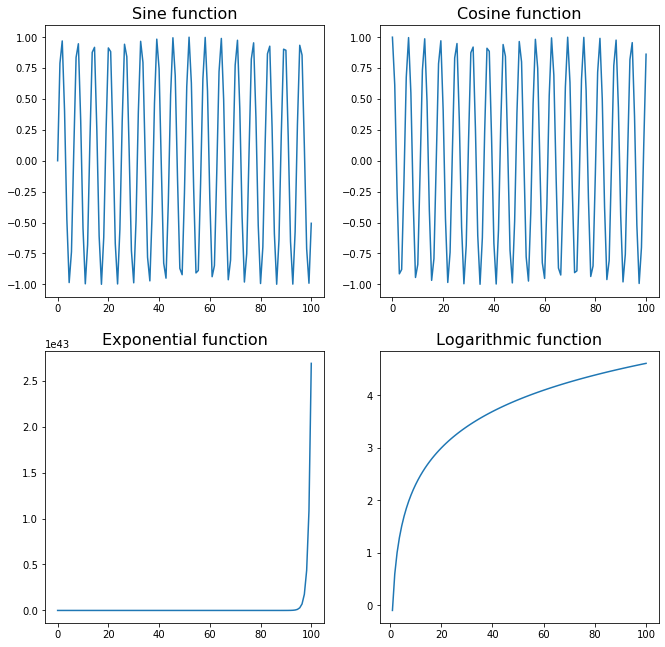

In [7]:
# X-axis linspace function 111 points from 0 to 100

x = np.linspace(0,100,111)

# Compute for mathmatical functions - sine, cosine, exponetial, and logarithmic functions
functions = [np.sin(x), np.cos(x), np.exp(x), np.log(x)]
titles = ['Sine function' , 'Cosine function', 'Exponential function', 'Logarithmic function']

# Plot the functions
plt.figure(figsize=(11,11))

for index , function in enumerate(functions):
    plt.subplot(2, 2, index+1)
    plt.plot(x,function)
    plt.title(titles[index],fontsize=16)

### 2. numpy.digitize
Maybe you have never heard about this function, but it can be really useful working with continuous spaces in reinforcement learning. The __numpy.digitze(x, bins, right = False)__ function has two arguments ;

1 . an input array __x__ , and 2 an array of __bins__ , returning the indices of the bins to which each value in input array belongs. 

In [13]:
# Input array
x = np.array([0.5])

# Bins - 5 bins in total
bins = np.array([0,1,2,3])

# Digitize function - 0.5 belong to the bin 0 <= 0.5 < 1 - therefore returned index 1 
np.digitize(x,bins)
# array([1], dtype=int64)

# The input array can contain several inputs
x = np.array([-0.5, 1, 3.5])

# Digitize function
np.digitize(x,bins)
# array([0, 2, 4], dtype=int64)

array([0, 2, 4], dtype=int64)

#### Example
In the code above, we have 5 bins in total;

- x < 0 -> index 0

- 0 <= x < 1 -> index 1

- 1 <= x < 2 -> index 2

- 2 <= x < 3 -> index 3

- 3 <= x -> index 4 

Therefore, if we provide as an input 0.5 , the function returns 1, since that is the index of the bin to which 0.5 belongs.

In reinforcement learning, we can discretize state spaces by using uniformly-spaced grids. Discretization allows us to apply algorithms designed for discrete spaces such as Sarsa, Sarsamax, or Expected Sarsa to continuous spaces.

Imagine we have the following continuous space. The agent can be in any position (x,y), where 0≤x≤5 and 0≤y≤5. We can discretize the position of the agent by providing a tuple, indicating the grid where the agent is located.


In [15]:
def discretize(location, grid):
    return tuple(int(np.digitize(l, g)) for l,g in zip(location, grid))

# grid - bins - we will consider any value lower than 1 bin 0 and any value larger than 4 bin 4
grid = [np.array([1,2,3,4]),np.array([1,2,3,4])]

location = [2.5, 1.2]
print(discretize(location,grid))
# (2 , 1)

location = [4.5,0.2]
print(discretize(location,grid))

(2, 1)
(4, 0)


We will consider than any value lower than 1 belongs to bin index 0 and any value larger than or equal to 4 belongs to bin index 4. we have transformed a continuous space into a discrete one.

### 3. numpy.repeat

The __numpy.repeat(a , repeats, axis = None )__ function repeats the elements of an array. The number of repetitions is specified by the second argument __repeats.__

In [17]:
# repeat number 3 5 times
np.repeat(3,5)
# array([3,3,3,3,3])

# repeat string '2015' 5time
np.repeat('2015', 5).
# array(['2015', '2015', '2015', '2015', '2015'], dtype='<U4')

array(['2015', '2015', '2015', '2015', '2015'], dtype='<U4')

#### Example
Let's say we have two different data frames, containing the sales in 2017 and 2018, but we want only one data frame, including all the information

In [19]:
import pandas as pd

In [20]:
# sales 2017
sales_2017 = pd.DataFrame([['chair',20],['sofa',24],['table',15]],columns=['product','sales_units'])

# sales 2018
sales_2018 = pd.DataFrame([['chair',25],['sofa',10],['shelf',10]],columns=['product','sales_units'])

Before merging both data frames, we need to add a column, specifying the year in which the products were sold. We can add this information by using the __numpy.repeat__ function. Subsequently, we concatenate both data frames by usign the __pandas.concat__ function.

In [24]:
sales_2017

,product,sales_units
0,chair,20
1,sofa,24
2,table,15


In [25]:
sales_2017.shape

(3, 2)

In [28]:
# add year column in data frame 2017
sales_2017['year'] = np.repeat(2017,sales_2017.shape[0])

# add year colum in data frame 2018
sales_2018['year'] = np.repeat(2018,sales_2018.shape[0])

sales = pd.concat([sales_2017, sales_2018], ignore_index=True) 

sales

,product,sales_units,year
0,chair,20,2017
1,sofa,24,2017
2,table,15,2017
3,chair,25,2018
4,sofa,10,2018
5,shelf,10,2018


# Above codes have 2 useful arguement ignore_index O , X  and  pd.concat technique 

### 4.Numpy.random

#### 4.1. numpy.random.randint

The __numpy.random.randint(low , high=None, size=None, dtype='l')__ function returns random integers from the interval [low,high). If __high__ parameter is missing(None), the random numbers are selected from the interval [0,low).

By default, a single random number(int) is returned. To generate a narray of random integers, the shape of the array is provided in the parameter __size__.

#### Example

This function can be used to simulate random events such as tossing a coin, or rolling a dice as shown below.

In [68]:
# toss a coin
np.random.randint(2)

# toss a coin 5 times
np.random.randint(2,size=5)

# roll a dice
np.random.randint(1,7)

# roll a dice 10 times
np.random.randint(1,7,size=10)

array([6, 2, 1, 3, 4, 4, 2, 2, 1, 2])

#### 4.2 numpy.random.choice
The __numpy.random.choice(a, size=None, replace=True, p=None)__ returns a random sample from a given array. By default, a single value is returned. To return more elements, the output shape can be specified in the parameter __size__ as we did before with the numpy.random.randint function

#### Example
The random events shown above can also be simulated by using the numpy.random.choice

In [82]:
# toss a coin
np.random.choice([0,1])

# toss a coin 5 times
np.random.choice([0,1],size=5)

# roll a dice
np.random.choice([1,2,3,4,5,6])

# roll a dice 10 times
np.random.choice([1,2,3,4,5,6],size=10)

array([3, 1, 6, 2, 2, 3, 4, 6, 1, 1])

By default , elements have equal probability of being selected. To assign different probabilities to each element, an array of probabilities __p__ can be provided. Using this parameter __p__, we can simulate a biased coin flip as follows:

In [110]:
# 0 -> head , 1 -> tail
# toss a biased coin (80% probability of obtain head - 20% tail)
np.random.choice([0,1],p=[0.8,0.2])

# toss a biased coin (80% probability of obtain head - 20% tail) 10 times
np.random.choice([0,1],size=10,p=[0.95,0.05])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### 4.3. numpy.random.binomial

We can simulate a wide variety of statistical distributions by using numpy such as normal, beta, binomial, uniform, gamma, or possion distributions.

The __numpy.random.binomial(n , p , size = None)__ draws samples from a binomial distribution. The binomial distribution is used when there are two mutually exclusive outcomes, providing the number of success of __n__ trials with a probability of success on a single trial __p.__

In [116]:
# number of successes (number of heads) in 10 coin flips
np.random.binomial(10,0.5)

# number of successes (number of heads) in 10 coin flips - biased coin with a 0.8 probability of obtaining heads
np.random.binomial(10,0.8)

# we can obtain approximated probabilities by simulating a huge number of flips
# probability of obtaining 4 head in 10 flips
flips = np.random.binomial(10,0.5,size=int(1e6))
(flips==4).mean()

0.206241

I recommend to read the documentation and discover the wide range of function that the numpy.random library provides.

#### 5.numpy.polyfit

The __numpy.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)__ function outputs a polynomial of degree deg that fits the points (x,y), minimizing the square error.

This function can be very useful in linear regression problems. Linear regression models the relationship between a dependent variable and an independent variable, obtaining a line that best fits the data.

    y =a+bx

where x is the independent variable, y is the dependent variable, b is the slope, and a is the intercept. To obtain both coefficients a and b, we can use the numpy.polyfit function as follows.

#### Example
Let's say we have a data frame containing the heights and weights of 5000 men.

In [140]:
df = pd.read_csv('../MEDIUM/0706/data/weight-height.csv')


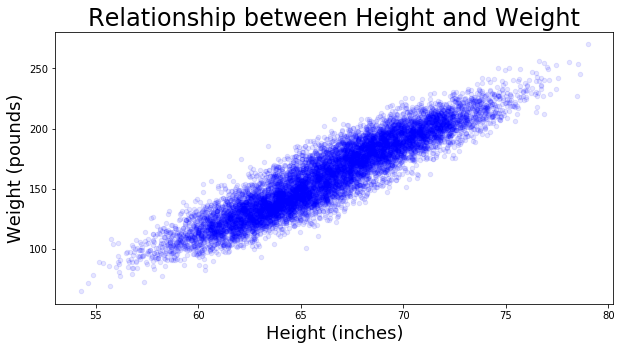

In [149]:
# relation between height and weight
df.plot(kind='scatter', x='Height',y='Weight', color='blue', alpha=0.1, figsize=(10,5))

# title , xlabel, and ylabel
plt.title('Relationship between Height and Weight', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Weight (pounds)', size=18);

We obtain the best-fit linear equation with the __numpy.polyfit__ function in the following manner;

In [150]:
# Polynomial coefficients.
fit = np.polyfit(df.Height,df.Weight,1)

fit

array([   7.71728764, -350.73719181])

The function returns the slope __(7.71)__ and intercept __(-350,737)__ of the linear model. now , we can employ the obtained model ( y= 7.71x-350.737) to predict the weight of a man(unseen data). This prediction can be obtained by using the __numpy.polyval__ function.

#### numpy.polyval
The __numpy.polyval(p,x)__ function evaluates a polynomial at specific values. Previously, we have obtained a linear model to predict the weight of a man ( weight = 7.71 * height - 350.73) by using the __numpy.polyfit__ function. Now , we use this model to make predictions with the __numpy.polyval__ function . Let's say we want to predict the weight of a men 70 inches tall. As arguments, we provide the polynomial coefficients ( obtained with polyfit) from highest degree to the constant term (p=[7.71,-350.73]), and a number at which to evaluate __p(x=70)__.

In [153]:
fit = np.polyfit(df.Height,df.Weight,1)

print(fit)

# Predict the weight - using the model weight = 7.71 * height - 350.73
np.polyval(fit,70)

[   7.71728764 -350.73719181]


189.47294304284014

#### 7.numpy.nan
Numpy library includes several __constants__ such as not a number (Nan), infinity (inf) or pi. In computing , not a number is a numeric data type that can be interpreted as a value that is undefined . We can use not a number to represent missing or null values in Pandas. Unfortunately, dirty data sets contain null values with other denominations ( e.g. Unknown, -- , and n/a), making difficult to detect and drop them.

#### Example
let's say we have the following data set, containing information about houses in the city of Madrid

In [156]:
'''
# replace Unknown and - by Nan
houses_madrid.replace(['Unknown','-'],np.nan, inplace=True)

# check missing values
houses_madrid.isnull().sum()

# drop rows with null values
houses_madrid.dropna(inplace=True)

houses_madrid
'''

"\n# replace Unknown and - by Nan\nhouses_madrid.replace(['Unknown','-'],np.nan, inplace=True)\n\n# check missing values\nhouses_madrid.isnull().sum()\n\n# drop rows with null values\nhouses_madrid.dropna(inplace=True)\n\nhouses_madrid\n"

#### 8.numpy.argmax
The __numpy.argmax(a, axis=None, out=None)__ function returns the indices of the maximum values along an axis.

In a 2d array, we can easily obtain the index of the maximum value as follows;

In [157]:
# numpy array
array = np.array([[1,2,3],[4,5,6]])

# index of maximum value
max_pos = np.argmax(array)

max_pos

5

We can obtain the indeces of maximum values along a specified axis, providing 0 or 1 to the __axis__ attribute.

In [160]:
# numpy array
array = np.array([[1,2,3],[4,5,6]])

# index of maximum value along axis 0
max_pos_0 = np.argmax(array, axis=0)

print(max_pos_0)

# index of maximum value along axis 1
max_pos_1 = np.argmax(array, axis=1)

print(max_pos_1)

[1 1 1]
[2 2]


#### Example
The __numpy.argmax__ can be very useful in reinforcement learning task. The __Q-table__ is an action-value function estimation that contains the __expected return__ for each state-action pair, assuming the agent is in state s , and takes action a , follwoing policy pi. until the end of the episode.

In [164]:
# Q table . states -> rows, actions -> columns

Q_table = pd.DataFrame({'a0': [10, 4, 3], 'a1': [1, 2, 8], 'a2':[4, 5, 1]}, index=['s0','s1','s2'])

Q_table

,a0,a1,a2
s0,10,1,4
s1,4,2,5
s2,3,8,1


We can easily obtain the policy by choosing the action __a__ that provides maximum __expected return__ for each state __s__.

In [167]:
# index of maximum value along axis 1
policy = np.argmax(Q_table.values, axis=1)

policy

array([0, 2, 1], dtype=int64)

In [169]:
policy2 = np.argmax(Q_table.values , axis=0)

policy2

array([0, 2, 1], dtype=int64)

In the above example, the __numpy.argmax__ function returns the policy : state 0 -> action 0, state 1 -> action 2 , and state 2 -> action 1.

#### 9.numpy.squeeze
The __numpy.squeeze(a, axis = None)__ removes single-dimensional entries from the shape of an array. The argument __axis__ specifies the axis we want to squeeze out. If the shape of the selected axis is greater than 1 a __ValueError__ is raised. An example of how to use numpy.squeeze function is shown below.

In [173]:
# numpy array of shape (1,2,1)

arr = np.array([[[1],[1]]])

arr.shape

# squeeze out axis 0
arr0 = np.squeeze(arr,axis=0)
print(arr0)
print(arr0.shape)

[[1]
 [1]]
(2, 1)


In [174]:
# squeeze out axis 1
arr1 = np.squeeze(arr,axis=1)
print(arr1)
print(arr1.shape)

ValueError: cannot select an axis to squeeze out which has size not equal to one

In [175]:
# squeeze out axis 2
arr2 = np.squeeze(arr,axis=2)
print(arr2)
print(arr2.shape)

[[1 1]]
(1, 2)


In [176]:
# squeeze all axes of shape 1
arrall = np.squeeze(arr)
arrall
# array([1, 1])
arrall.shape

(2,)

#### Example
__Pytorch__ is an open source machine learning library based on the Torch library.

The library provides multiple data sets such as MNIST, Fashion-MINST, or CIFAR that we can use for training neural networks. 

First, we download the data set (e.g. MNIST) with the torchvision.datasets function. 

Then, we create an iterable by using torch.utils.data.DataLoader. This iterable is passed to the iter() method, generating an iterator. Finally, we get each element of the iterator by using the next() method.

Those elements are tensors of shape [N,C,H,W], being N — batch size, C — number of channels, H — height of input planes in pixels, and W width in pixels.

In [177]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms

In [178]:
# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# load the mnist datasets
data = datasets.MNIST(root='data', download=True, transform=transform)

# create an iterable over the datset
loader = torch.utils.data.DataLoader(data, batch_size=20)

# iterate over the iterator one element at a time
dataiter = iter(loader)
images, labels = dataiter.next()

# batch size 20 - numer of channels 1 
# height of input planes in pixels 28, and W width in pixels 28.
images.shape

torch.Size([20, 1, 28, 28])

To visualize an element of the precious batch, we have to eliminate the first axis since the __matplotlib.pyplot.imshow__ function accepts as an input an image of shape (H,W)

# GOOOOOOOOOOOOOOOOOOOD YUREKA!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! below technique 

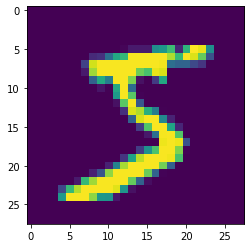

In [184]:
import matplotlib.pyplot as plt
%matplotlib inline

# select first element of the batch
images[0].shape

# plt.imshow(images[0])
# TypeError ; Invalid dimensions for image data

# eliminate the first axis.
np.squeeze(images[0]).shape
# torch.Size([28 , 28])

plt.imshow(np.squeeze(images[0]))

### 10.numpy.histogram

The __numpy.histogram(a, bins=10, range=None, normed=None, weights=None, density=None)__ computes the histogram of a set of data. The function returns 2 values :

1. the frequency count

2. the bin edges.

#### Example
The following data frame contains the height of 5000 men. We create a histogram plot, passing __kind='hist'__ to the __plot__ method.

Text(0, 0.5, 'Frequency')

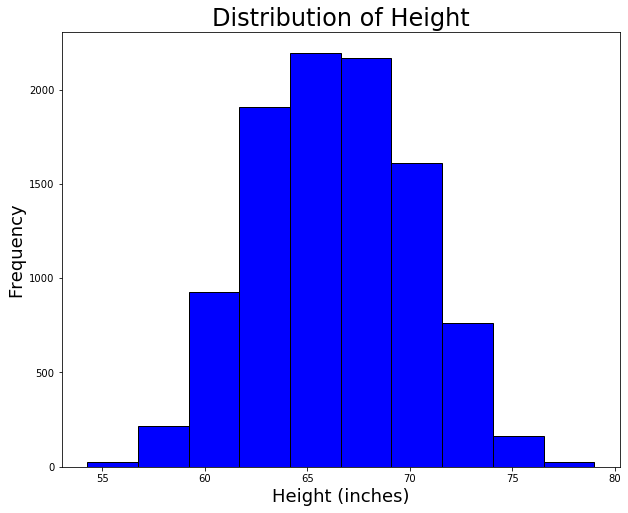

In [185]:
# data frame containing the height of 5000 men
df.Height.plot(kind='hist', color='blue', edgecolor='black',figsize=(10,8))

# title. xlabel, and ylabel
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18)

By default, the histogram method breaks up the data set into 10 bins.
NOtice that the x-axis labels do not match with the bin size. This can be fixed by passing in a __xticks__ parameter, containing the list of the bin sizes, in the following manner;

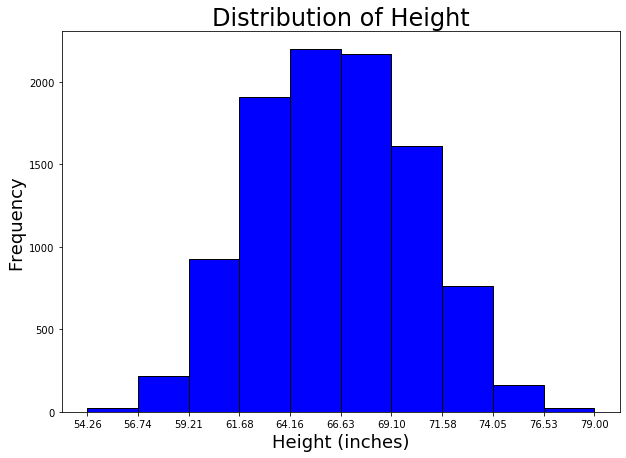

In [186]:
#'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df.Height)

#xticks keyword with bin edges
df.Height.plot(kind='hist',color='blue',edgecolor='black',xticks=bin_edges ,figsize=(10,7))

#title, xlabel, and ylabel.
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Frequency', size=18);